TRAIN_DIR = './imageData' #이 디렉터리안에 있는 이름을 다 바꿈
train_folder_list = array(os.listdir(TRAIN_DIR))

train_input = []
train_label = []
label_encoder = Lablencoder() #folderlist를 가지고옴
integer_encoded = label_encodr.fit_transform #integer 인코딩, 넘버링을 해줌 / 폴더개수가 2니까
#image_path = image하나의
#cv2.grayscale = 흑백으로
#os.listdir(path) #이안에 있는걸 다 list화
#np.array로 만듦
#train_input = [0-9 , 10-19] >> 20, 10000(사진사이즈) / 100x100
#print(train_input,reshape(20,100,100)) >>그래서 위에 한줄로 해도 상관x 
#logit = 확률 (사과, 바나나) >>더큰게 더 확률이 높음
#오버핏팅 = 다 외워서 아는거면 말함 / 외운 데이터 이외에는 오답을 말할 확률이 높음
#interpolation = 늘렸을때비는값을채움


In [2]:
#!pip install opencv-python

In [3]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array

In [4]:
TRAIN_DIR = './imageData/'
train_folder_list = array(os.listdir(TRAIN_DIR))
 
train_input = []
train_label = []
 
label_encoder = LabelEncoder()  # LabelEncoder Class 호출
integer_encoded = label_encoder.fit_transform(train_folder_list)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        train_input.append([np.array(img)])
        train_label.append([np.array(onehot_encoded[index])])
        
train_input = np.reshape(train_input, (-1, 10000))
train_label = np.reshape(train_label, (-1, 2))
train_input = np.array(train_input).astype(np.float32)
train_label = np.array(train_label).astype(np.float32)

print(train_input.shape)
print(train_label.shape)

np.save("train_data.npy", train_input)
np.save("train_label.npy", train_label)

(30, 10000)
(30, 2)


In [5]:
import matplotlib.pyplot as plt
sample = train_input[0].reshape(100, 100)
print(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

(100, 100)


<Figure size 640x480 with 1 Axes>

In [6]:
#!pip install tensorflow

In [7]:
import tensorflow as tf

C:\Users\haedal\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
# hyper parameters
learning_rate = 0.001
 
# input place holders
X = tf.placeholder(tf.float32, [None, 10000])
X_img = tf.reshape(X, [-1, 100, 100, 1])   # img 28x28x1 (black/white)
Y = tf.placeholder(tf.float32, [None, 2])
 
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
 
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

L2_flat = tf.reshape(L2, [-1, 25 * 25 * 64])
W3 = tf.get_variable("W3", shape=[25 * 25 * 64, 2], initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([2]))
logits = tf.matmul(L2_flat, W3) + b
 
# define cost/loss &amp;amp;amp; optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
 
training_epochs = 30
batch_size = 1
 
# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(len(train_input) / batch_size)
 
    for i in range(total_batch):
        start = ((i + 1) * batch_size) - batch_size
        end = ((i + 1) * batch_size)
        batch_xs = train_input[start:end]
        batch_ys = train_label[start:end]
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
 
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
 
print('Learning Finished!')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Epoch: 0001 cost = 43.616686487
Epoch: 0002 cost = 27.644855538
Epoch: 0003 cost = 0.913828626
Epoch: 0004 cost = 10.802201365
Epoch: 0005 cost = 2.080060588
Epoch: 0006 cost = 0.819879462
Epoch: 0007 cost = 0.825783445
Epoch: 0008 cost = 0.689528477
Epoch: 0009 cost = 8.447587843
Epoch: 0010 cost = 0.807601835
Epoch: 0011 cost = 19.194414056
Epoch: 0012 cost = 0.796992125
Epoch: 0013 cost = 0.764726661
Epoch: 0014 cost = 1.671774391
Epoch: 0015 cost = 0.798424748
Epoch: 0016 cost = 0.792772145
Epoch: 0017 cost = 0.786783894
Epoch: 0018 cost = 0.786097477
Epoch: 0019 cost = 0.779727378
Epoch: 0020 cost = 0.780838265
Epoch: 0021 cost = 0.773651447
Epoch: 0022 cost = 0.776448196
Epoch: 0023 cost = 0.755848203
Epoch: 0024 cost = 0.762572134
Epoch: 0025 cost = 0.745249091
Epoch: 0026 cost = 0.66760340

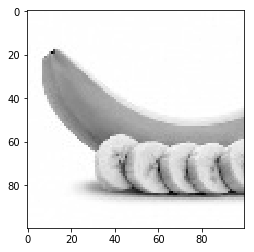

[[1.1379724 1.8971891]]
banana


In [16]:
test_input = train_input[23]

plt.imshow(test_input.reshape(100,100), cmap='gray')
plt.show()

logit = sess.run(logits, feed_dict={X: [test_input]})

print(logit)
if logit[0,0] > logit[0,1]:
    print("apple")
else:
    print("banana")